<i>Importing Required Packages</i>

In [90]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import (train_test_split, GridSearchCV, RandomizedSearchCV)

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, confusion_matrix)

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import randint,uniform

import joblib

<h2> 1. Data collection </h2>

<i>Loading cleaned dataset</i>

In [31]:
data = pd.read_csv("../DATASET/Cleaned_Data.csv")

In [32]:
data

,JEE Main %,JEE Advanced %,Mock Avg %,School Board,HSC %,Attempts,Coaching,Study Hour Bin,Family Income,Parent Education,Location Type,Peer Pressure Level,Mental Health,Admission,Dropout
0,70.05,60.66,72.20,CBSE,87.65,2,Allen,Low,High,HSC,Semi-Urban,High,Yes,No,0
1,45.29,65.47,68.14,State,90.51,1,FIITJEE,Very Low,High,PG,Rural,Medium,Yes,No,0
2,87.04,97.72,69.84,CBSE,74.71,1,Self Study,High,High,PG,Semi-Urban,High,No,Yes,0
3,89.08,67.55,89.16,CBSE,90.62,2,FIITJEE,Medium,Mid,PG,Urban,Medium,No,No,0
4,71.97,63.44,39.70,CBSE,84.53,2,Allen,Medium,Low,PG,Semi-Urban,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,61.84,67.35,83.18,CBSE,91.11,1,Local,Low,Low,PG,Rural,Medium,Yes,No,1
5942,71.92,53.30,49.52,CBSE,64.62,2,FIITJEE,High,Low,HSC,Rural,Low,No,No,1
5943,61.82,47.76,87.65,CBSE,67.08,1,Allen,Low,Low,PG,Rural,High,Yes,No,1
5944,71.93,44.24,44.52,ICSE,69.56,1,Allen,Low,Low,PG,Semi-Urban,Low,No,No,1


<h2> 2. Data preprocessing </h2>

<i>Get the basic info about the dataset</i>

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5946 entries, 0 to 5945
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JEE Main %           5946 non-null   float64
 1   JEE Advanced %       5946 non-null   float64
 2   Mock Avg %           5946 non-null   float64
 3   School Board         5946 non-null   object 
 4   HSC %                5946 non-null   float64
 5   Attempts             5946 non-null   int64  
 6   Coaching             5946 non-null   object 
 7   Study Hour Bin       5896 non-null   object 
 8   Family Income        5946 non-null   object 
 9   Parent Education     5946 non-null   object 
 10  Location Type        5946 non-null   object 
 11  Peer Pressure Level  5946 non-null   object 
 12  Mental Health        5946 non-null   object 
 13  Admission            5946 non-null   object 
 14  Dropout              5946 non-null   int64  
dtypes: float64(4), int64(2), object(9)
mem

<i> Memory optimization </i>

In [34]:
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].astype('category')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5946 entries, 0 to 5945
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   JEE Main %           5946 non-null   float64 
 1   JEE Advanced %       5946 non-null   float64 
 2   Mock Avg %           5946 non-null   float64 
 3   School Board         5946 non-null   category
 4   HSC %                5946 non-null   float64 
 5   Attempts             5946 non-null   int64   
 6   Coaching             5946 non-null   category
 7   Study Hour Bin       5896 non-null   category
 8   Family Income        5946 non-null   category
 9   Parent Education     5946 non-null   category
 10  Location Type        5946 non-null   category
 11  Peer Pressure Level  5946 non-null   category
 12  Mental Health        5946 non-null   category
 13  Admission            5946 non-null   category
 14  Dropout              5946 non-null   int64   
dtypes: category(9), float

<i> See Missing Values </i>

In [36]:
data.isna().sum()

JEE Main %              0
JEE Advanced %          0
Mock Avg %              0
School Board            0
HSC %                   0
Attempts                0
Coaching                0
Study Hour Bin         50
Family Income           0
Parent Education        0
Location Type           0
Peer Pressure Level     0
Mental Health           0
Admission               0
Dropout                 0
dtype: int64

<i> Encode Categorical Variables (using OneHotEncoder) </i>

In [37]:
categorical_columns = data.select_dtypes(include='category').columns

In [38]:
ohe = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

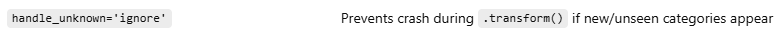

In [39]:
cat_values = ohe.fit_transform(data[categorical_columns])

In [40]:
cat_values.shape

(5946, 30)

In [41]:
encoded_feature_names = ohe.get_feature_names_out(categorical_columns)
encoded_feature_names

array(['School Board_CBSE', 'School Board_ICSE', 'School Board_State',
       'Coaching_Allen', 'Coaching_FIITJEE', 'Coaching_Local',
       'Coaching_Self Study', 'Study Hour Bin_High', 'Study Hour Bin_Low',
       'Study Hour Bin_Medium', 'Study Hour Bin_Very High',
       'Study Hour Bin_Very Low', 'Study Hour Bin_nan',
       'Family Income_High', 'Family Income_Low', 'Family Income_Mid',
       'Parent Education_Graduate', 'Parent Education_HSC',
       'Parent Education_PG', 'Parent Education_SSLC',
       'Location Type_Rural', 'Location Type_Semi-Urban',
       'Location Type_Urban', 'Peer Pressure Level_High',
       'Peer Pressure Level_Low', 'Peer Pressure Level_Medium',
       'Mental Health_No', 'Mental Health_Yes', 'Admission_No',
       'Admission_Yes'], dtype=object)

In [42]:
cat_df = pd.DataFrame(cat_values, columns=encoded_feature_names)
cat_df

,School Board_CBSE,School Board_ICSE,School Board_State,Coaching_Allen,Coaching_FIITJEE,Coaching_Local,Coaching_Self Study,Study Hour Bin_High,Study Hour Bin_Low,Study Hour Bin_Medium,...,Location Type_Rural,Location Type_Semi-Urban,Location Type_Urban,Peer Pressure Level_High,Peer Pressure Level_Low,Peer Pressure Level_Medium,Mental Health_No,Mental Health_Yes,Admission_No,Admission_Yes
0,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00
1,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,...,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
3,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
4,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
5942,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,...,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
5943,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00
5944,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00


<i> Drop original categorical columns and concat encoded columns </i>

In [43]:
data_encoded = pd.concat([data.drop(columns=(categorical_columns)), cat_df], axis=1)
data_encoded

,JEE Main %,JEE Advanced %,Mock Avg %,HSC %,Attempts,Dropout,School Board_CBSE,School Board_ICSE,School Board_State,Coaching_Allen,...,Location Type_Rural,Location Type_Semi-Urban,Location Type_Urban,Peer Pressure Level_High,Peer Pressure Level_Low,Peer Pressure Level_Medium,Mental Health_No,Mental Health_Yes,Admission_No,Admission_Yes
0,70.05,60.66,72.20,87.65,2,0,1.00,0.00,0.00,1.00,...,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00
1,45.29,65.47,68.14,90.51,1,0,0.00,0.00,1.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
2,87.04,97.72,69.84,74.71,1,0,1.00,0.00,0.00,0.00,...,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
3,89.08,67.55,89.16,90.62,2,0,1.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
4,71.97,63.44,39.70,84.53,2,0,1.00,0.00,0.00,1.00,...,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,61.84,67.35,83.18,91.11,1,1,1.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
5942,71.92,53.30,49.52,64.62,2,1,1.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
5943,61.82,47.76,87.65,67.08,1,1,1.00,0.00,0.00,1.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00
5944,71.93,44.24,44.52,69.56,1,1,0.00,1.00,0.00,1.00,...,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00


<i> Format floats to 2 decimal places </i>

In [44]:
pd.set_option('display.float_format',lambda X : '%.2f' %X)

In [45]:
data_encoded

,JEE Main %,JEE Advanced %,Mock Avg %,HSC %,Attempts,Dropout,School Board_CBSE,School Board_ICSE,School Board_State,Coaching_Allen,...,Location Type_Rural,Location Type_Semi-Urban,Location Type_Urban,Peer Pressure Level_High,Peer Pressure Level_Low,Peer Pressure Level_Medium,Mental Health_No,Mental Health_Yes,Admission_No,Admission_Yes
0,70.05,60.66,72.20,87.65,2,0,1.00,0.00,0.00,1.00,...,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00
1,45.29,65.47,68.14,90.51,1,0,0.00,0.00,1.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
2,87.04,97.72,69.84,74.71,1,0,1.00,0.00,0.00,0.00,...,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
3,89.08,67.55,89.16,90.62,2,0,1.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
4,71.97,63.44,39.70,84.53,2,0,1.00,0.00,0.00,1.00,...,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,61.84,67.35,83.18,91.11,1,1,1.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
5942,71.92,53.30,49.52,64.62,2,1,1.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
5943,61.82,47.76,87.65,67.08,1,1,1.00,0.00,0.00,1.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00
5944,71.93,44.24,44.52,69.56,1,1,0.00,1.00,0.00,1.00,...,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00


In [46]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5946 entries, 0 to 5945
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   JEE Main %                  5946 non-null   float64
 1   JEE Advanced %              5946 non-null   float64
 2   Mock Avg %                  5946 non-null   float64
 3   HSC %                       5946 non-null   float64
 4   Attempts                    5946 non-null   int64  
 5   Dropout                     5946 non-null   int64  
 6   School Board_CBSE           5946 non-null   float64
 7   School Board_ICSE           5946 non-null   float64
 8   School Board_State          5946 non-null   float64
 9   Coaching_Allen              5946 non-null   float64
 10  Coaching_FIITJEE            5946 non-null   float64
 11  Coaching_Local              5946 non-null   float64
 12  Coaching_Self Study         5946 non-null   float64
 13  Study Hour Bin_High         5946 

<i> Scaling Numerical Features using StandardScaler </i>

In [47]:
numerical_to_scale = ['JEE Main %', 'JEE Advanced %', 'Mock Avg %', 'HSC %', 'Attempts']

In [48]:
scaler = StandardScaler()

In [49]:
data_encoded[numerical_to_scale] = scaler.fit_transform(data_encoded[numerical_to_scale])

In [50]:
data_encoded.head()

,JEE Main %,JEE Advanced %,Mock Avg %,HSC %,Attempts,Dropout,School Board_CBSE,School Board_ICSE,School Board_State,Coaching_Allen,...,Location Type_Rural,Location Type_Semi-Urban,Location Type_Urban,Peer Pressure Level_High,Peer Pressure Level_Low,Peer Pressure Level_Medium,Mental Health_No,Mental Health_Yes,Admission_No,Admission_Yes
0,-0.11,-0.32,0.32,1.33,1.19,0,1.00,0.00,0.00,1.00,...,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00
1,-1.90,-0.02,-0.03,1.63,-0.84,0,0.00,0.00,1.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
2,1.11,2.02,0.12,-0.02,-0.84,0,1.00,0.00,0.00,0.00,...,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
3,1.26,0.12,1.77,1.64,1.19,0,1.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
4,0.03,-0.14,-2.47,1.01,1.19,0,1.00,0.00,0.00,1.00,...,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00


In [51]:
data_encoded.tail()

,JEE Main %,JEE Advanced %,Mock Avg %,HSC %,Attempts,Dropout,School Board_CBSE,School Board_ICSE,School Board_State,Coaching_Allen,...,Location Type_Rural,Location Type_Semi-Urban,Location Type_Urban,Peer Pressure Level_High,Peer Pressure Level_Low,Peer Pressure Level_Medium,Mental Health_No,Mental Health_Yes,Admission_No,Admission_Yes
5941,-0.70,0.10,1.26,1.69,-0.84,1,1.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
5942,0.02,-0.78,-1.63,-1.07,1.19,1,1.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
5943,-0.71,-1.13,1.64,-0.81,-0.84,1,1.00,0.00,0.00,1.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00
5944,0.02,-1.36,-2.05,-0.55,-0.84,1,0.00,1.00,0.00,1.00,...,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
5945,0.16,0.57,-0.92,-1.66,-0.84,1,0.00,1.00,0.00,1.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00


<i> Splitting the dataset in to X [Independent variables] and Y [Dependent variables] </i>

<i> Move 'Dropout' column to the end </i>

In [52]:
target = 'Dropout'
cols = [col for col in data_encoded.columns if col != target] + [target]
data_encoded = data_encoded[cols]

In [53]:
data_encoded

,JEE Main %,JEE Advanced %,Mock Avg %,HSC %,Attempts,School Board_CBSE,School Board_ICSE,School Board_State,Coaching_Allen,Coaching_FIITJEE,...,Location Type_Semi-Urban,Location Type_Urban,Peer Pressure Level_High,Peer Pressure Level_Low,Peer Pressure Level_Medium,Mental Health_No,Mental Health_Yes,Admission_No,Admission_Yes,Dropout
0,-0.11,-0.32,0.32,1.33,1.19,1.00,0.00,0.00,1.00,0.00,...,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0
1,-1.90,-0.02,-0.03,1.63,-0.84,0.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0
2,1.11,2.02,0.12,-0.02,-0.84,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0
3,1.26,0.12,1.77,1.64,1.19,1.00,0.00,0.00,0.00,1.00,...,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0
4,0.03,-0.14,-2.47,1.01,1.19,1.00,0.00,0.00,1.00,0.00,...,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,-0.70,0.10,1.26,1.69,-0.84,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1
5942,0.02,-0.78,-1.63,-1.07,1.19,1.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1
5943,-0.71,-1.13,1.64,-0.81,-0.84,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1
5944,0.02,-1.36,-2.05,-0.55,-0.84,0.00,1.00,0.00,1.00,0.00,...,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1


In [54]:
data_encoded.columns

Index(['JEE Main %', 'JEE Advanced %', 'Mock Avg %', 'HSC %', 'Attempts',
       'School Board_CBSE', 'School Board_ICSE', 'School Board_State',
       'Coaching_Allen', 'Coaching_FIITJEE', 'Coaching_Local',
       'Coaching_Self Study', 'Study Hour Bin_High', 'Study Hour Bin_Low',
       'Study Hour Bin_Medium', 'Study Hour Bin_Very High',
       'Study Hour Bin_Very Low', 'Study Hour Bin_nan', 'Family Income_High',
       'Family Income_Low', 'Family Income_Mid', 'Parent Education_Graduate',
       'Parent Education_HSC', 'Parent Education_PG', 'Parent Education_SSLC',
       'Location Type_Rural', 'Location Type_Semi-Urban',
       'Location Type_Urban', 'Peer Pressure Level_High',
       'Peer Pressure Level_Low', 'Peer Pressure Level_Medium',
       'Mental Health_No', 'Mental Health_Yes', 'Admission_No',
       'Admission_Yes', 'Dropout'],
      dtype='object')

In [55]:
X = data_encoded.drop(columns=['Dropout'])
X

,JEE Main %,JEE Advanced %,Mock Avg %,HSC %,Attempts,School Board_CBSE,School Board_ICSE,School Board_State,Coaching_Allen,Coaching_FIITJEE,...,Location Type_Rural,Location Type_Semi-Urban,Location Type_Urban,Peer Pressure Level_High,Peer Pressure Level_Low,Peer Pressure Level_Medium,Mental Health_No,Mental Health_Yes,Admission_No,Admission_Yes
0,-0.11,-0.32,0.32,1.33,1.19,1.00,0.00,0.00,1.00,0.00,...,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00
1,-1.90,-0.02,-0.03,1.63,-0.84,0.00,0.00,1.00,0.00,1.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
2,1.11,2.02,0.12,-0.02,-0.84,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
3,1.26,0.12,1.77,1.64,1.19,1.00,0.00,0.00,0.00,1.00,...,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
4,0.03,-0.14,-2.47,1.01,1.19,1.00,0.00,0.00,1.00,0.00,...,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,-0.70,0.10,1.26,1.69,-0.84,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
5942,0.02,-0.78,-1.63,-1.07,1.19,1.00,0.00,0.00,0.00,1.00,...,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
5943,-0.71,-1.13,1.64,-0.81,-0.84,1.00,0.00,0.00,1.00,0.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00
5944,0.02,-1.36,-2.05,-0.55,-0.84,0.00,1.00,0.00,1.00,0.00,...,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00


In [56]:
Y = data_encoded[['Dropout']]
Y

,Dropout
0,0
1,0
2,0
3,0
4,0
...,...
5941,1
5942,1
5943,1
5944,1


<h2> 3. Feature Selection </h2>

<i>

    Reduce irrelevant or redundant features to:

    Improve model accuracy

    Reduce overfitting

    Speed up training
</i>

<i> <strong> Common Feature Selection Methods: </strong></i>

1 - Correlation Analysis (for numeric features) - Remove features that are highly correlated with each other (multicollinearity).

2 - Filter Method

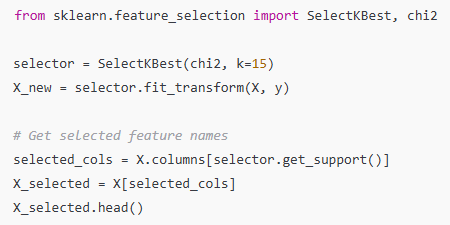

3 - Recursive Feature Elimination (Wrapper Method)

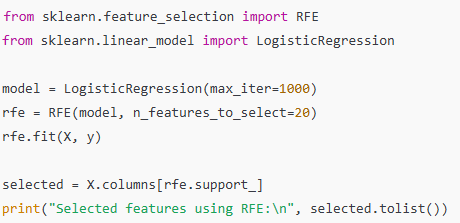

4 - Feature Importance from Tree-Based Models (Embedded Method)

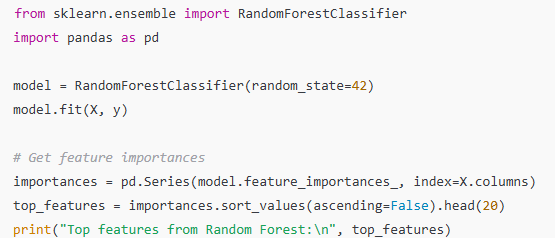

<i>
Small Dataset:

    If our dataset has fewer rows and a large number of columns due to encoding, then removing features may harm model performance more than help it.
</i>

<i> 
OneHotEncoding

    OneHotEncoding adds many binary columns for a single original feature (e.g., Study Hour Bin → 6 binary columns).
    So removing 4 out of 6 based on importance may kill the context of the original feature.
</i>

<i>
    Categorical Dominant Dataset:
    
    Feature selection using importance scores like RandomForestClassifier or XGBoost is biased toward numerical or high-cardinality features.
    So these might undervalue simple binary indicators created by OneHotEncoding.
</i>

<i>
    Feature selection is not mandatory — it's only needed when:

        We have a lot of noise features
        Performance is bad
        Or we're trying to simplify a model
</i>

<h2> 4. Model Selection </h2>

<i> 

    1 - Splitting the dataset in to training and testing sets 

    2 - Defining Models to evaluate

    3 - Storing results

</i>

In [57]:
def model_selection(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state= 42)

    models={
        "Logistic Regression": LogisticRegression(),
        "Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "XGBoost": XGBClassifier(),
        "Support Vector Machine": SVC(probability=True)
        #Without probability=True, SVC() won't have predict_proba() and will skip ROC AUC or give incorrect values.
    }

    results=[]

    for name, model in models.items():
        model.fit(X_train, Y_train)
        Y_pred= model.predict(X_test)
        Y_Pred_proba = model.predict_proba(X_test)[:,1] if hasattr(model, 'predict_proba') else Y_pred
        # hasattr is a built-in function in Python used to check if an object has a specific named attribute.

        results.append(
            {
                "Model": model,
                "Model Name": name,
                "Accuracy": accuracy_score(Y_test, Y_pred),
                "Precision": precision_score(Y_test, Y_pred),
                "Recall": recall_score(Y_test, Y_pred),
                "F1 Score": f1_score(Y_test, Y_pred),
                "ROC AUC": roc_auc_score(Y_test, Y_Pred_proba)            
            }
        )

        print(f"\n Classification Report : {name}")
        print(classification_report(Y_test, Y_pred))
        print("="*60)

        print(f"\n Confusion Matxix : {name}")
        cm = confusion_matrix(Y_test, Y_pred)
        plt.figure(figsize=(10,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix - {name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()

    return pd.DataFrame(results).sort_values(by='F1 Score',ascending=False).reset_index(drop=True)

<i>

    4 - Calling the function
</i>


 Classification Report : Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       606
           1       0.96      0.95      0.96       584

    accuracy                           0.96      1190
   macro avg       0.96      0.96      0.96      1190
weighted avg       0.96      0.96      0.96      1190


 Confusion Matxix : Logistic Regression


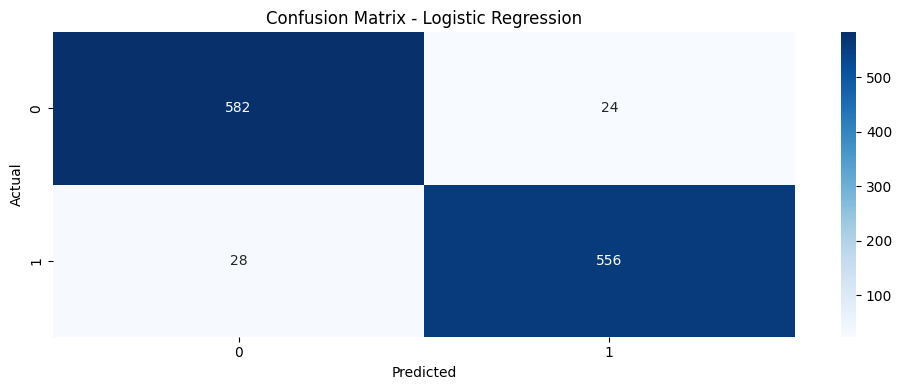


 Classification Report : Naive Bayes
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       606
           1       0.95      0.91      0.93       584

    accuracy                           0.93      1190
   macro avg       0.93      0.93      0.93      1190
weighted avg       0.93      0.93      0.93      1190


 Confusion Matxix : Naive Bayes


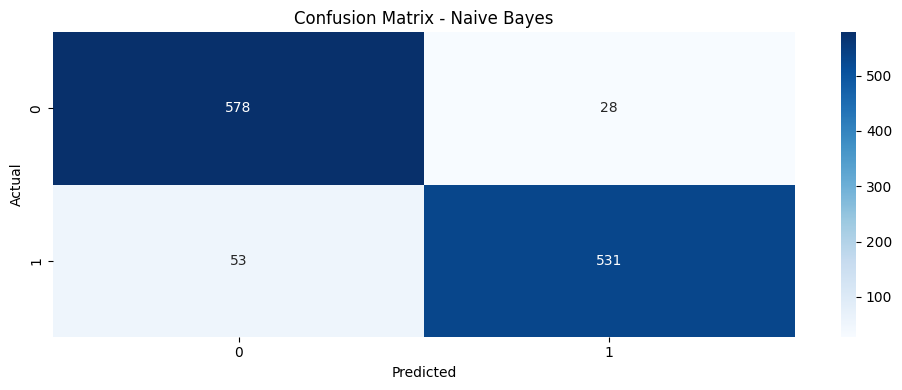


 Classification Report : K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       606
           1       0.85      0.98      0.91       584

    accuracy                           0.91      1190
   macro avg       0.92      0.91      0.91      1190
weighted avg       0.92      0.91      0.91      1190


 Confusion Matxix : K-Nearest Neighbors


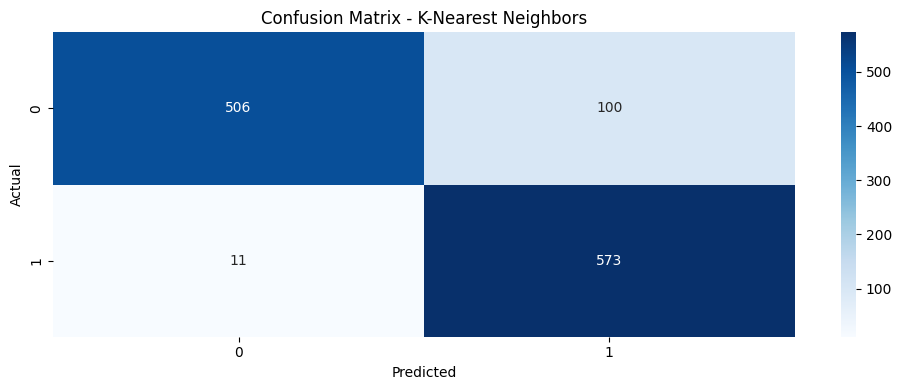


 Classification Report : Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       606
           1       0.96      0.98      0.97       584

    accuracy                           0.97      1190
   macro avg       0.97      0.97      0.97      1190
weighted avg       0.97      0.97      0.97      1190


 Confusion Matxix : Decision Tree


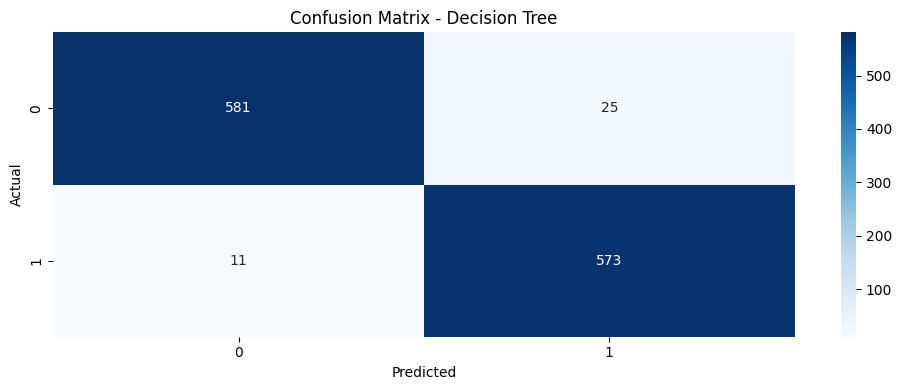


 Classification Report : Random Forest
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       606
           1       0.99      0.97      0.98       584

    accuracy                           0.98      1190
   macro avg       0.98      0.98      0.98      1190
weighted avg       0.98      0.98      0.98      1190


 Confusion Matxix : Random Forest


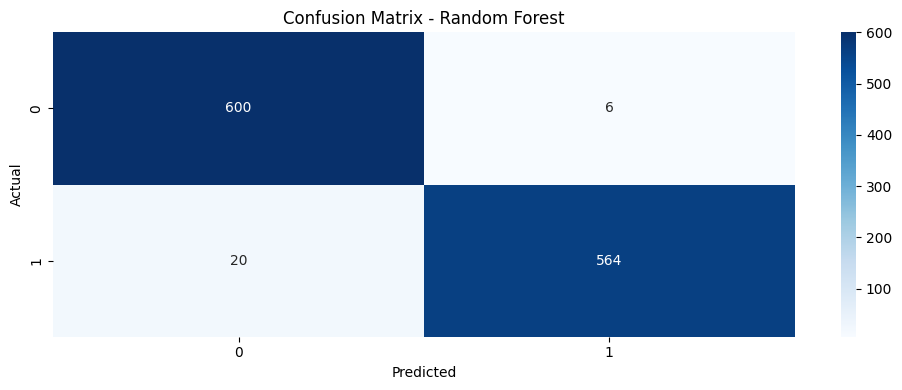


 Classification Report : AdaBoost
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       606
           1       0.93      0.96      0.95       584

    accuracy                           0.95      1190
   macro avg       0.95      0.95      0.95      1190
weighted avg       0.95      0.95      0.95      1190


 Confusion Matxix : AdaBoost


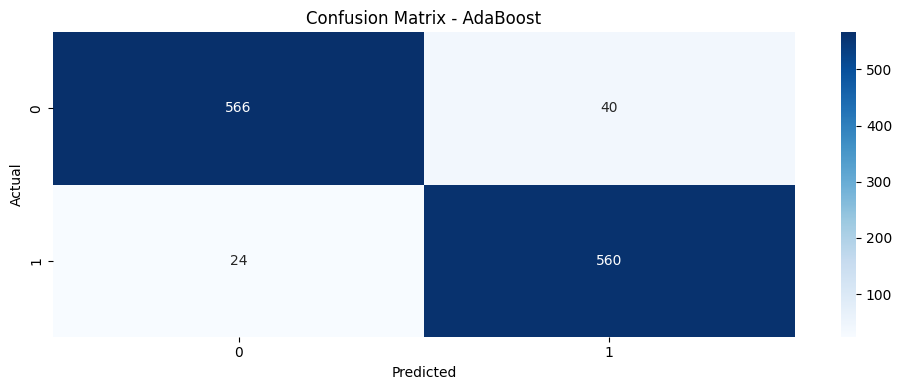


 Classification Report : Gradient Boosting
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       606
           1       0.99      0.96      0.98       584

    accuracy                           0.98      1190
   macro avg       0.98      0.98      0.98      1190
weighted avg       0.98      0.98      0.98      1190


 Confusion Matxix : Gradient Boosting


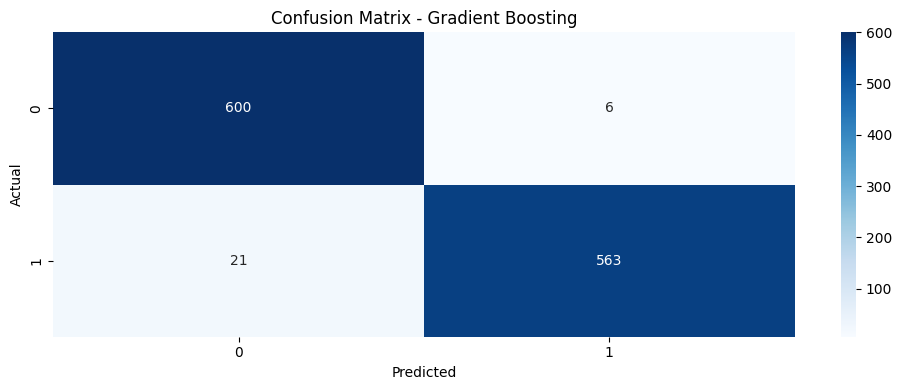


 Classification Report : XGBoost
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       606
           1       0.99      0.98      0.98       584

    accuracy                           0.98      1190
   macro avg       0.98      0.98      0.98      1190
weighted avg       0.98      0.98      0.98      1190


 Confusion Matxix : XGBoost


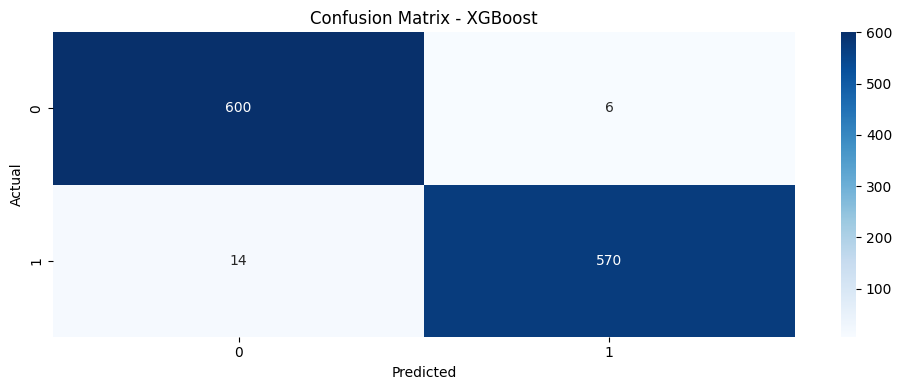


 Classification Report : Support Vector Machine
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       606
           1       0.99      0.95      0.97       584

    accuracy                           0.97      1190
   macro avg       0.97      0.97      0.97      1190
weighted avg       0.97      0.97      0.97      1190


 Confusion Matxix : Support Vector Machine


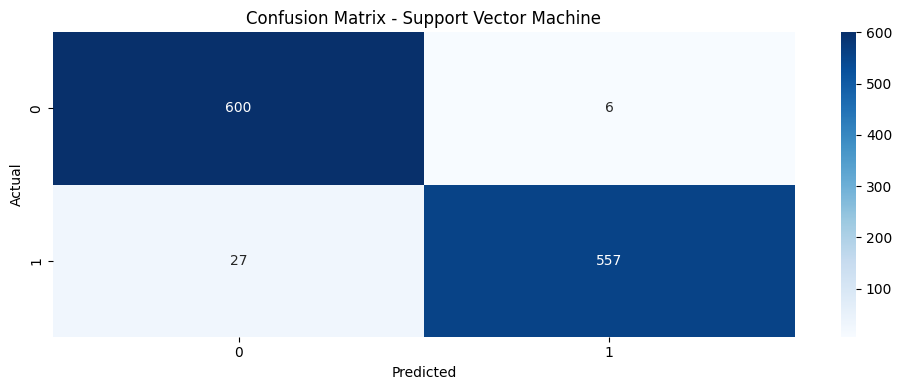

,Model,Model Name,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,"XGBClassifier(base_score=None, booster=None, c...",XGBoost,0.98,0.99,0.98,0.98,1.00
1,"(DecisionTreeClassifier(max_features='sqrt', r...",Random Forest,0.98,0.99,0.97,0.98,1.00
2,([DecisionTreeRegressor(criterion='friedman_ms...,Gradient Boosting,0.98,0.99,0.96,0.98,1.00
3,SVC(probability=True),Support Vector Machine,0.97,0.99,0.95,0.97,0.99
4,DecisionTreeClassifier(),Decision Tree,0.97,0.96,0.98,0.97,0.97
5,LogisticRegression(),Logistic Regression,0.96,0.96,0.95,0.96,0.99
6,"(DecisionTreeClassifier(max_depth=1, random_st...",AdaBoost,0.95,0.93,0.96,0.95,0.99
7,GaussianNB(),Naive Bayes,0.93,0.95,0.91,0.93,0.98
8,KNeighborsClassifier(),K-Nearest Neighbors,0.91,0.85,0.98,0.91,0.97


In [58]:
best_model = model_selection(X,Y)
best_model

<i> Plotting Barplot </i>

In [59]:
def plot_f1_bar(best_model):
    plt.figure(figsize=(10,4))
    sns.barplot(data=best_model, x='F1 Score', y='Model Name', palette='coolwarm')
    plt.title("Model - F1 Score")
    plt.xlabel("F1 Score")
    plt.ylabel("Model Name")
    plt.tight_layout()
    plt.show()

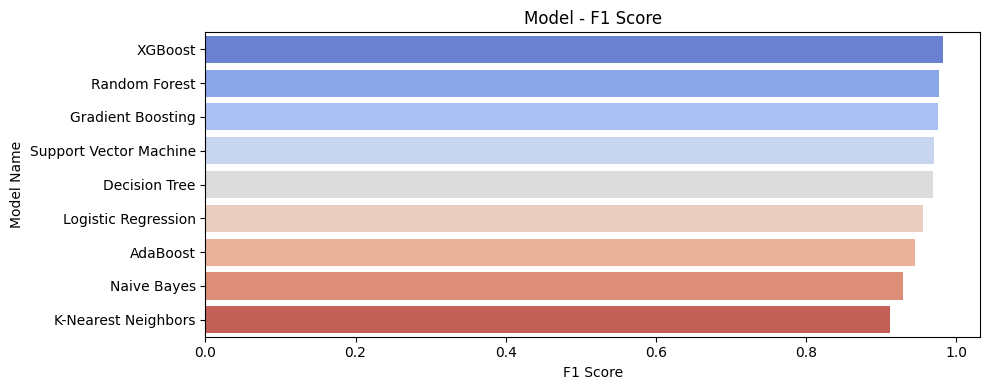

In [60]:
plot_f1_bar(best_model)

<h2> 5. Training the Model </h2>

<i> Final training using best model [XGBoost] with some reasonable default or hand-picked parameters — no GridSearch or RandomSearch at this stage. </i>

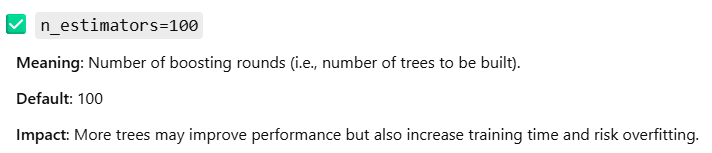

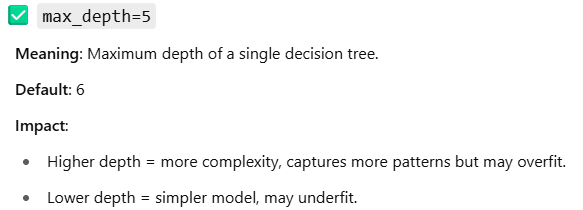

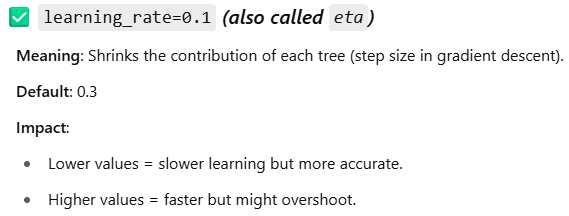

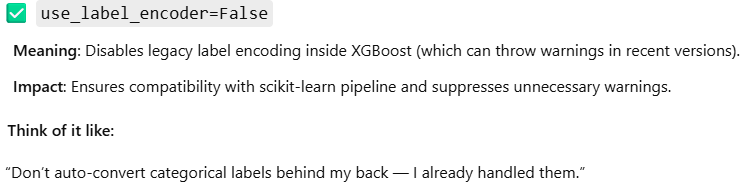

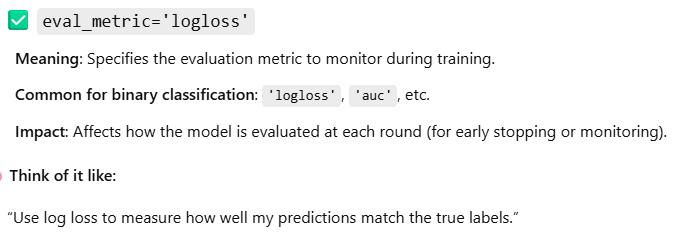

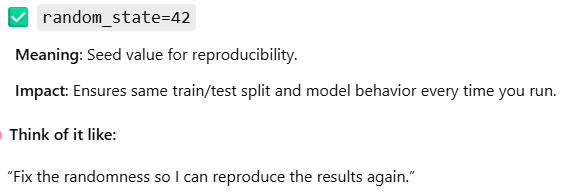

<i> Defining the model </i>

In [61]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.2,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

<i> Fitting the model</i>

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state= 42)
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

<i> Predicting using the defined model [XGBoost]</i>

In [63]:
Prediction = xgb_model.predict(X_test)
Prediction

array([0, 0, 0, ..., 0, 0, 1], shape=(1190,))

In [64]:
Y_test

,Dropout
2264,0
3669,0
1406,0
5858,1
3666,1
...,...
4726,1
4244,1
12,0
1117,0


<h2> 6. Evaluate & Validate the Model </h2>

| Metric                    | Description                                            |
| ------------------------- | ------------------------------------------------------ |
| **Accuracy**              | % of total correct predictions                         |
| **Precision**             | How many predicted positives are actually positive     |
| **Recall**                | How many actual positives were correctly predicted     |
| **F1 Score**              | Harmonic mean of precision and recall                  |
| **Confusion Matrix**      | Matrix showing TP, FP, FN, TN                          |
| **ROC AUC (optional)**    | Measures how well the model separates classes          |
| **Classification Report** | Full breakdown of precision, recall, F1 for each class |


Model Evaluation Metrics
Accuracy : 0.9832
Precision : 0.9896
Recall : 0.9760
F1_Score : 0.9828
ROC_AUC : 0.9831

 Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       606
           1       0.99      0.98      0.98       584

    accuracy                           0.98      1190
   macro avg       0.98      0.98      0.98      1190
weighted avg       0.98      0.98      0.98      1190



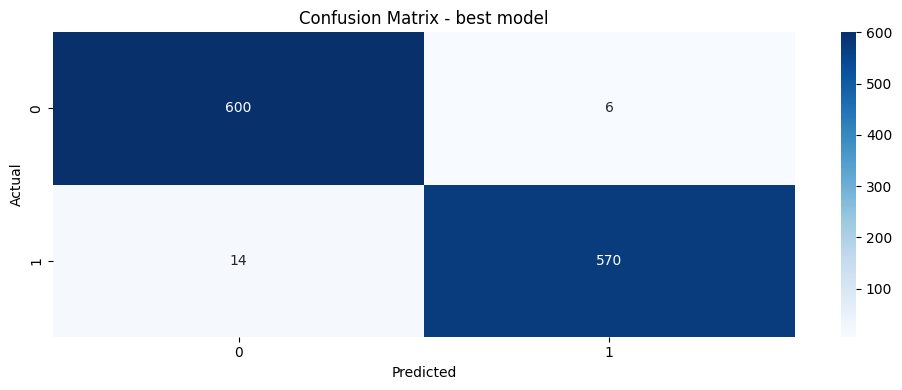

In [65]:
print("Model Evaluation Metrics")
print("="*60)

print(f"Accuracy : {accuracy_score(Y_test, Prediction):.4f}")
print(f"Precision : {precision_score(Y_test, Prediction):.4f}")
print(f"Recall : {recall_score(Y_test, Prediction):.4f}")
print(f"F1_Score : {f1_score(Y_test, Prediction):.4f}")
print(f"ROC_AUC : {roc_auc_score(Y_test, Prediction):.4f}")

print("="*60)
print("\n Classification Report")
print(classification_report(Y_test, Prediction))

confusion_matrix_metrics = confusion_matrix(Y_test, Prediction)
plt.figure(figsize=(10,4))
sns.heatmap(confusion_matrix_metrics, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - best model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

<i> ROC - AUC </i>

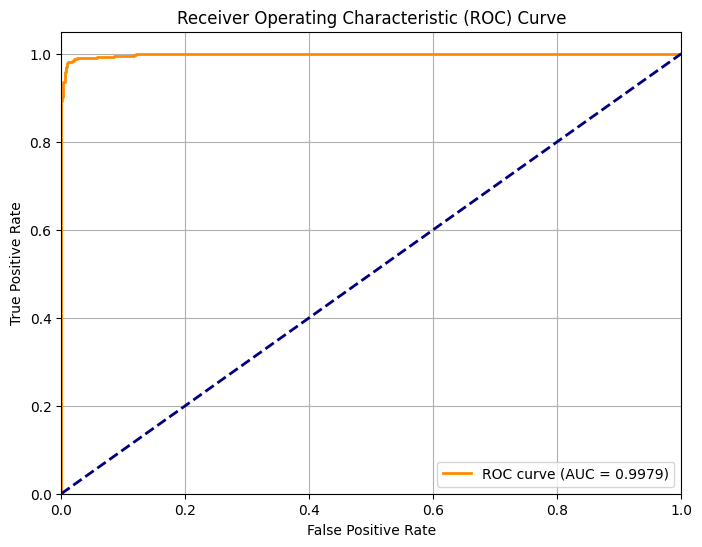

In [66]:
Prediction_proba = xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, Prediction_proba)
auc_score = roc_auc_score(Y_test, Prediction_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

The ROC curve for XGBoost model shows excellent classification ability with an AUC of 0.9979, indicating near-perfect distinction between the classes. 

The model significantly outperforms random guessing, as seen by the curve lying far above the diagonal reference line.

<h2> 7. Hyperparameter tuning </h2>

<i> 

    Optimize our model's performance by finding the best set of parameters. 

    We’ve already trained our model with some fixed parameters. Now let’s automate and improve that with systematic tuning.
</i>

<h4> 1. Grid Search (Exhaustive) </h4>

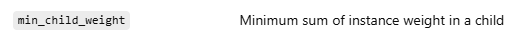

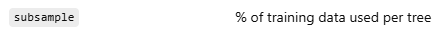

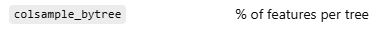

In [67]:
params= {
    'n_estimators':[100, 150, 200, 250],
    'max_depth': [4,5,6,7,8],
    'learning_rate':[0.01,0.1,0.2,0.3],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_model = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False,eval_metric='logloss'),
    param_grid=params, 
    scoring='f1',
    cv=5)

grid_model.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.8, 1], 'gamma': [0, 0.1, 0.3],
                         'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 150, 200, 250],
                         'subsample': [0.8, 1]},
             scoring='f1')

In [68]:
print(f"Best Parameter : Grid Search - {grid_model.best_params_}")
print(f"Best Score : Grid Search {grid_model.best_score_:.4f}")

Best Parameter : Grid Search - {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1}
Best Score : Grid Search 0.9828


<h4> 2. Randomized Search (Faster than Grid) -- Randomly samples combinations </h4>

In [69]:
params= {
    'n_estimators':randint(100,500),
    'max_depth': randint(3,15),
    'learning_rate':uniform(0.01, 0.4),
    'min_child_weight': randint(3,10),
    'gamma': uniform(0, 0.5),
    'subsample': uniform(0.5, 1),
    'colsample_bytree': uniform(0.5, 1)
}

randomized_model = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False,eval_metric='logloss'),
    param_distributions=params, 
    scoring='f1',
    cv=5,
    random_state=42,
    n_iter=15)

randomized_model.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002902CC52710>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002902CC52990>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002901FBED400>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002902CC50550>},
                   random_state=42, scoring='f1')

In [70]:
print(f"Best Parameter : RandomizedSearch - {randomized_model.best_params_}")
print(f"Best Score : RandomizedSearch {randomized_model.best_score_:.4f}")

Best Parameter : RandomizedSearch - {'colsample_bytree': np.float64(0.5580836121681995), 'gamma': np.float64(0.4330880728874676), 'learning_rate': np.float64(0.2504460046972835), 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 249, 'subsample': np.float64(0.5564115790271003)}
Best Score : RandomizedSearch 0.9762


<i> Comparing Models [Grid & Randomized] on Validation/Test Set </i>

In [71]:
grid_pred = grid_model.predict(X_test)
randomized_pred = randomized_model.predict(X_test)

print("Grid model Classification report:\n\n", classification_report(Y_test, grid_pred))
print("="*60)
print("Randomized model Classification report:\n\n", classification_report(Y_test, randomized_pred))


Grid model Classification report:

               precision    recall  f1-score   support

           0       0.98      0.99      0.98       606
           1       0.99      0.98      0.98       584

    accuracy                           0.98      1190
   macro avg       0.98      0.98      0.98      1190
weighted avg       0.98      0.98      0.98      1190

Randomized model Classification report:

               precision    recall  f1-score   support

           0       0.97      0.98      0.97       606
           1       0.98      0.97      0.97       584

    accuracy                           0.97      1190
   macro avg       0.97      0.97      0.97      1190
weighted avg       0.97      0.97      0.97      1190



<i> Comparing Models [Grid & Randomized] on ROC - AUC </i>

In [72]:
grid_pred_proba = grid_model.predict_proba(X_test)[:,1]
randomized_pred_proba = randomized_model.predict_proba(X_test)[:,1]

fpr1, tpr1, thresholds1 = roc_curve(Y_test, grid_pred_proba)
auc_score_grid = roc_auc_score(Y_test, grid_pred_proba)

fpr2, tpr2, thresholds2 = roc_curve(Y_test, randomized_pred_proba)
auc_score_randomized = roc_auc_score(Y_test, randomized_pred_proba)


<i> Plotting the graph </i>

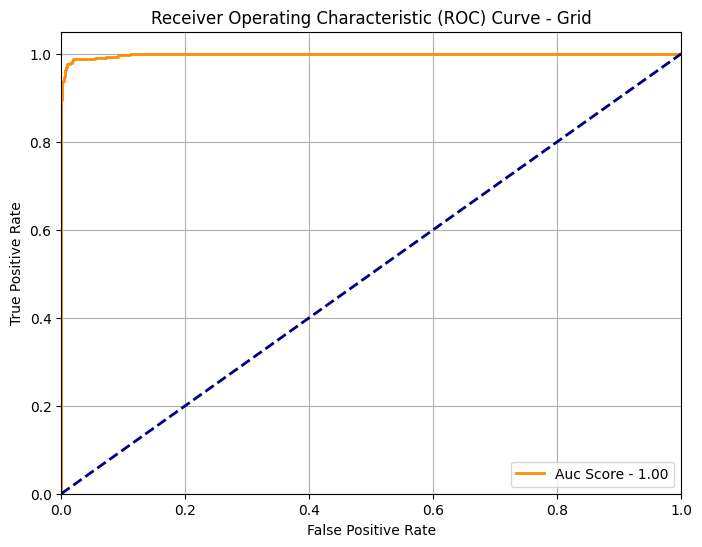

In [73]:
plt.figure(figsize=(8,6))
plt.plot(fpr1, tpr1, color = "darkorange", lw = 2, label=f"Auc Score - {auc_score_grid:.2f}")
plt.plot([0,1],[0,1], color="navy", lw =2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve - Grid")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

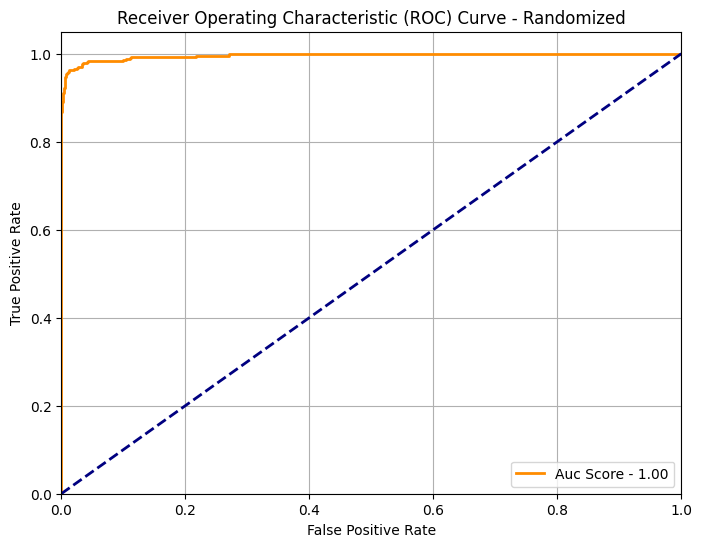

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(fpr2, tpr2, color = "darkorange", lw = 2, label=f"Auc Score - {auc_score_randomized:.2f}")
plt.plot([0,1],[0,1], color="navy", lw =2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve - Randomized")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

<i> 

    Since both models perform well, but Grid Search gave the highest F1-score and better recall/precision, 
    
    We should move forward with the Grid Search model. 
</i>

<i> Retrain Final Model on Full Training Data </i>

In [75]:
final_model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        colsample_bytree=0.8, 
        gamma=0.1, 
        learning_rate=0.2, 
        max_depth=5, 
        min_child_weight=1, 
        n_estimators=100, 
        subsample=1
)

final_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

<i> Predict the test data with final model </i>

In [76]:
final_Prediction = final_model.predict(X_test)
final_Prediction

array([0, 0, 0, ..., 0, 0, 1], shape=(1190,))

<i> Evaluate the final model </i>

In [77]:
print("Final model Classification report:\n\n", classification_report(Y_test, final_Prediction))

Final model Classification report:

               precision    recall  f1-score   support

           0       0.98      0.99      0.98       606
           1       0.99      0.98      0.98       584

    accuracy                           0.98      1190
   macro avg       0.98      0.98      0.98      1190
weighted avg       0.98      0.98      0.98      1190



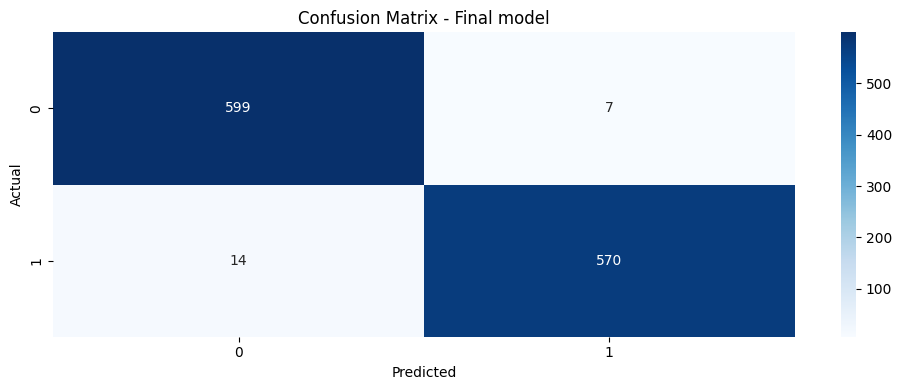

In [79]:
final_model_cm_metrics= confusion_matrix(Y_test, final_Prediction)
plt.figure(figsize=(10,4))
sns.heatmap(final_model_cm_metrics, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - Final model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

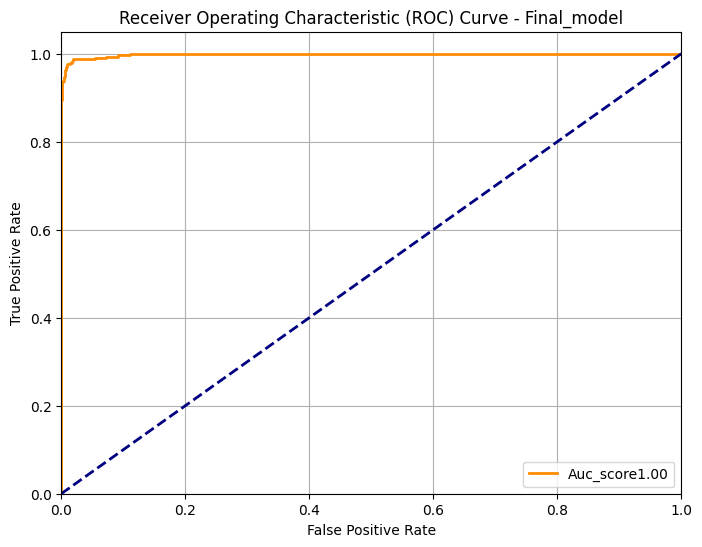

In [89]:
final_Prediction_proba = final_model.predict_proba(X_test)[:,1]

final_fpr, final_tpr, final_thresholds = roc_curve(Y_test,final_Prediction_proba)
auc_score_final= roc_auc_score(Y_test, final_Prediction_proba)


plt.figure(figsize=(8,6))
plt.plot(final_fpr, final_tpr, lw=2,color ="darkorange",label =f'Auc_score{auc_score_final:.2f}')
plt.plot([0,1],[0,1], lw=2, color ='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve - Final_model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

<h4> Save the Final Model </h4>

In [91]:
joblib.dump(final_model, 'Dropout_predictor_final_model ')

['Dropout_predictor_final_model ']

<i> load the saved final model </i>

In [97]:
loaded_model  = joblib.load('Dropout_predictor_final_model ')

<i> Predict  with the loaded model </i>

In [104]:
Y_train.iloc[[0]]

,Dropout
4666,1


In [ ]:
loaded_model_pred = loaded_model.predict(X_train.iloc[[0]])
loaded_model_pred

array([1])

In [108]:
Y_test.iloc[[8]]

,Dropout
1726,0


In [110]:
loaded_model_pred = loaded_model.predict(X_test.iloc[[8]])
loaded_model_pred

array([0])